# Setup Colab

Prepares Colab by:
1. Cloning Rabrg/dqn and cd'ing into it
2. Installing the missing required libraries 
3. Setting up a virtual display for rendering Gym environments

In [1]:
!git clone https://github.com/Rabrg/dqn.git
%cd dqn/
!apt-get install -y xvfb python-opengl x11-utils ffmpeg build-essential python-dev swig python-pygame
!pip install pyvirtualdisplay pyglet==v1.5.0 colabgymrender Box2D box2d-py gym[box2d]
from pyvirtualdisplay import Display
_ = Display(visible=0, size=(800, 600)).start()

Cloning into 'dqn'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 61 (delta 20), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (61/61), done.
/content/dqn
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python-dev is already the newest version (2.7.15~rc1-1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-freefont-ttf libfluidsynth1 libmad0 libmikmod3 libportmidi0
  libsdl-image1.2 libsdl-mixer1.2 libsdl-ttf2.0-0 libsdl1.2debian libsmpeg0
  libxxf86dga1 swig3.0 timgm6mb-soundfont
Suggested packages:
  libgle3 timidity swig-doc swig-examples swig3.0-examples s

# Train an agent

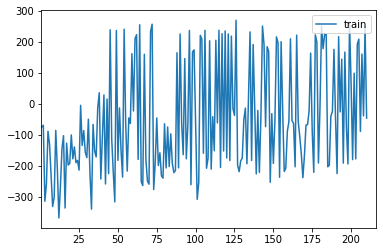

In [2]:
from dqn.dqn import DQN
from torch import nn
import gym


env = gym.wrappers.Monitor(gym.make("LunarLander-v2"), "./monitor/", force=True)
model = nn.Sequential(
    nn.Linear(env.observation_space.shape[0], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, env.action_space.n),
)

dqn = DQN(env, model)
dqn.learn(n_episodes=216)

# Demo the agent playing

In [3]:
from IPython.display import HTML
from base64 import b64encode

latest_video_path = env.videos[-1][0]
video_base64 = b64encode(open(latest_video_path, "rb").read()).decode()
video_data = f"data:video/mp4;base64,{video_base64}"
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % video_data)